In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.linear_model as lm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [4]:
train_x = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/independent_train.csv")
train_y = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/dependent_train.csv")
test_x = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/independent_test.csv")
test_y = pd.read_csv("/Users/luchengliang/02450_project2/2023-10-05_jennifer_data_preparation/dependent_test.csv")

<h1>Baseline confusion matrix<h1>

In [6]:
#Calaculate the most frequent appearance in the class (0, 1)
most_freq_class = np.bincount(train_y.to_numpy().flatten()).argmax()
predictions = np.full_like(test_y, most_freq_class)

confusion_matrix = confusion_matrix(test_y, predictions)
accuracy = accuracy_score(test_y, predictions)

# Print results
print(f'Accuracy for Baseline model classification: {accuracy:.3f}')
print('Confusion Matrix: ')
print(confusion_matrix)

Accuracy for Baseline model classification: 0.688
Confusion Matrix: 
[[44  0]
 [20  0]]


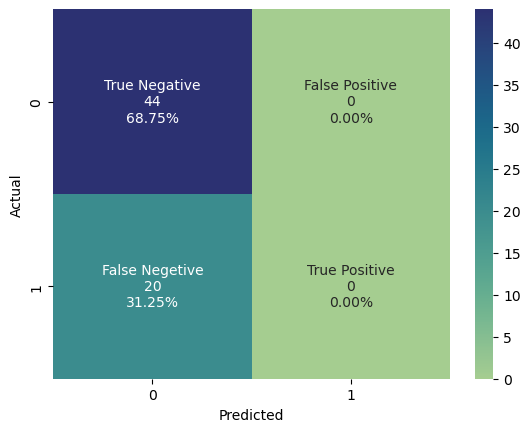

In [7]:
group_names = ['True Negative', 'False Positive', 'False Negetive', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap="crest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h1>Logistic Regression Confusion Matrix<h1>